## The original image, and its associated caption (decoded from token IDs).

In [6]:
import sys
import os
sys.path.append(os.path.abspath(".."))



In [13]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from src.dataset import ImageCaptionDataset, my_transforms, build_vocab_from_captions, MyTokenizer

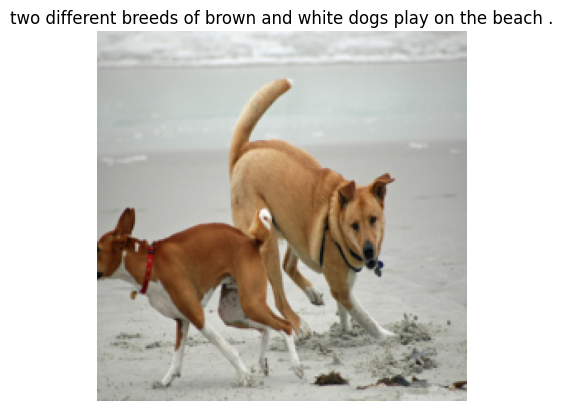

In [20]:


# Build vocab and dataset
import os
BASE_DIR = os.path.abspath("..")
CSV_PATH = os.path.join(BASE_DIR, "data", "Captions", "captions.txt")
IMG_PATH = os.path.join(BASE_DIR, "data", "Images")

vocab = build_vocab_from_captions(CSV_PATH)
my_tokenizer = MyTokenizer(vocab)
dataset = ImageCaptionDataset(
    csv_file=CSV_PATH,
    img_folder=IMG_PATH,
    tokenizer=my_tokenizer,
    transform=my_transforms
)


# Reverse vocab for decoding ids back to words
idx2word = {idx: word for word, idx in vocab['word2idx'].items()}

def decode_caption(caption_tensor):
    tokens = []
    for idx in caption_tensor:
        word = idx2word.get(idx.item(), "<unk>")
        if word == '<eos>':
            break
        if word != '<sos>' and word != '<pad>':
            tokens.append(word)
    return ' '.join(tokens)

# Pick an index
idx = 100  # or any random number in range(len(dataset))
image, caption_tensor = dataset[idx]

# Denormalize for displaying
mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
image_display = image * std + mean  # unnormalize
image_display = F.to_pil_image(image_display)

# Show image and caption
plt.imshow(image_display)
plt.axis('off')
plt.title(decode_caption(caption_tensor))
plt.show()
